In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

housing = fetch_california_housing()

X = housing.data       
y = housing.target      

print("Feature names:", housing.feature_names)
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset shape: (20640, 8)
Target shape: (20640,)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

r2_train = lin_reg.score(X_train, y_train)
r2_test = lin_reg.score(X_test, y_test)

print(f"R² (train): {r2_train:.4f}")
print(f"R² (test):  {r2_test:.4f}")

R² (train): 0.6099
R² (test):  0.5911


In [3]:
rf_model = RandomForestRegressor(
    n_estimators=500,     
    oob_score=True,        
    random_state=42,       
    n_jobs=-1              
)

rf_model.fit(X_train, y_train)

r2_train = rf_model.score(X_train, y_train)
r2_test = rf_model.score(X_test, y_test)
oob_score = rf_model.oob_score_

print(f"R² (train): {r2_train:.4f}")
print(f"R² (test):  {r2_test:.4f}")
print(f"OOB score:  {oob_score:.4f}")

R² (train): 0.9741
R² (test):  0.8096
OOB score:  0.8090


/home/administrateur/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/administrateur/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


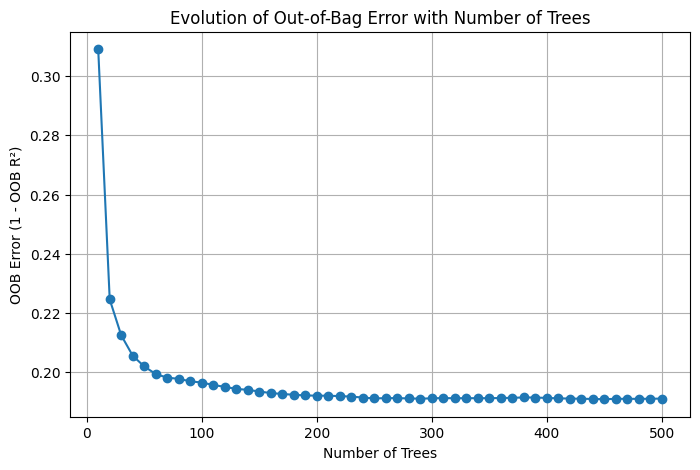

In [4]:
rf_model = RandomForestRegressor(
    n_estimators=1,        
    warm_start=True,    
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

oob_errors = []
n_trees_range = range(10, 501, 10)  

for n_trees in n_trees_range:
    rf_model.set_params(n_estimators=n_trees)
    rf_model.fit(X_train, y_train)
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)

plt.figure(figsize=(8, 5))
plt.plot(n_trees_range, oob_errors, marker='o')
plt.title("Evolution of Out-of-Bag Error with Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error (1 - OOB R²)")
plt.grid(True)
plt.show()

Number of predictors (p): 8
Candidate max_features values: [8, 4, 2, 3, 5, 7]
max_features=8      →  OOB error = 0.1910
max_features=4      →  OOB error = 0.1819
max_features=2      →  OOB error = 0.1802
max_features=3      →  OOB error = 0.1784
max_features=5      →  OOB error = 0.1866
max_features=7      →  OOB error = 0.1886


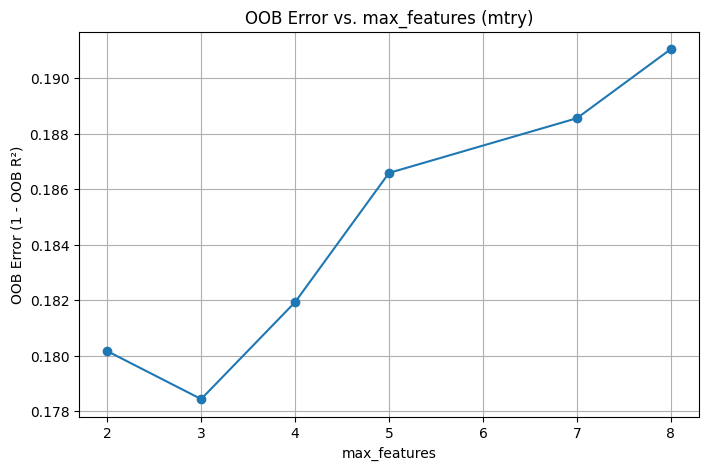


 Best max_features = 3 (OOB error = 0.1784)


In [5]:
p = X_train.shape[1]  
print("Number of predictors (p):", p)

candidates = [p, p//2, int(np.sqrt(p)), 3, 5, 7] 
print("Candidate max_features values:", candidates)

oob_errors = []

for m in candidates:
    rf = RandomForestRegressor(
        n_estimators=500,
        max_features=m,
        oob_score=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)
    print(f"max_features={m:<5}  →  OOB error = {oob_error:.4f}")

candidates = np.array(candidates)
oob_errors = np.array(oob_errors)

sorted_idx = np.argsort(candidates)
candidates_sorted = candidates[sorted_idx]
oob_errors_sorted = oob_errors[sorted_idx]

plt.figure(figsize=(8,5))
plt.plot(candidates_sorted, oob_errors_sorted, marker='o', linestyle='-')
plt.title("OOB Error vs. max_features (mtry)")
plt.xlabel("max_features")
plt.ylabel("OOB Error (1 - OOB R²)")
plt.grid(True)
plt.show()

best_idx = np.argmin(oob_errors)
best_m = candidates[best_idx]
print(f"\n Best max_features = {best_m} (OOB error = {oob_errors[best_idx]:.4f})")

In [6]:
best_max_features = 3

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
r2_lin = lin_reg.score(X_test, y_test)

rf_default = RandomForestRegressor(
    n_estimators=500,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
rf_default.fit(X_train, y_train)
r2_rf_default = rf_default.score(X_test, y_test)

rf_tuned = RandomForestRegressor(
    n_estimators=200,
    max_features=best_max_features,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
rf_tuned.fit(X_train, y_train)
r2_rf_tuned = rf_tuned.score(X_test, y_test)

print("Model Performance on Test Set (R²):")
print(f"  Linear Regression:       {r2_lin:.4f}")
print(f"  Random Forest (default): {r2_rf_default:.4f}")
print(f"  Random Forest (tuned):   {r2_rf_tuned:.4f}")

print("\nOOB Scores:")
print(f"  Default RF OOB: {rf_default.oob_score_:.4f}")
print(f"  Tuned RF OOB:   {rf_tuned.oob_score_:.4f}")

Model Performance on Test Set (R²):
  Linear Regression:       0.5911
  Random Forest (default): 0.8096
  Random Forest (tuned):   0.8168

OOB Scores:
  Default RF OOB: 0.8090
  Tuned RF OOB:   0.8176


      Feature  Importance
0      MedInc    0.400585
5    AveOccup    0.128404
6    Latitude    0.119520
7   Longitude    0.117692
2    AveRooms    0.106838
1    HouseAge    0.055075
3   AveBedrms    0.040472
4  Population    0.031413


/tmp/ipykernel_5325/3830118649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


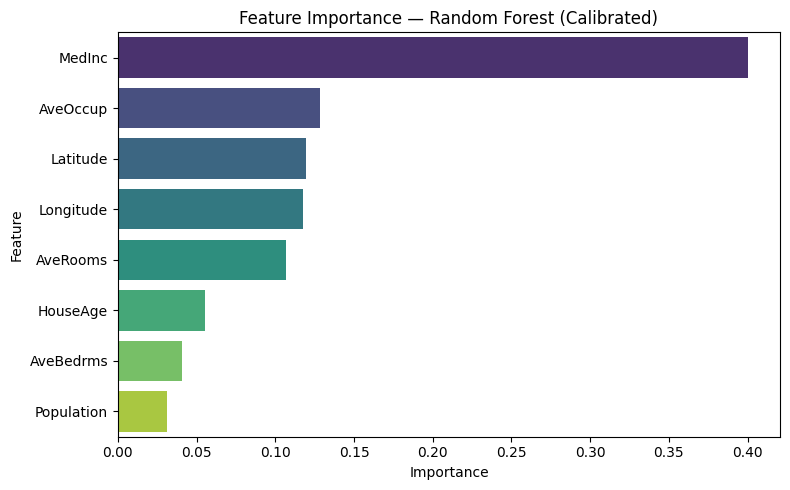

In [7]:
feature_names = housing.feature_names

importances = rf_tuned.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(8,5))
sns.barplot(
    data=importance_df,
    x='Importance', y='Feature',
    palette='viridis'
)
plt.title("Feature Importance — Random Forest (Calibrated)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_lm_train = lm.predict(X_train)
y_hat_lm_test = lm.predict(X_test)

X_train_aug = np.hstack([X_train, y_hat_lm_train.reshape(-1,1)])
X_test_aug = np.hstack([X_test, y_hat_lm_test.reshape(-1,1)])

lm_aug = LinearRegression()
lm_aug.fit(X_train_aug, y_train)
r2_aug = lm_aug.score(X_test_aug, y_test)
r2_orig = lm.score(X_test, y_test)

print(f"R² original Linear Regression: {r2_orig:.4f}")
print(f"R² augmented Linear Regression: {r2_aug:.4f}")

rf_tuned.fit(X_train_aug, y_train)
r2_rf_aug = rf_tuned.score(X_test_aug, y_test)
print(f"R² Random Forest with LM feature: {r2_rf_aug:.4f}")

R² original Linear Regression: 0.5911
R² augmented Linear Regression: 0.5911
R² Random Forest with LM feature: 0.8177


In [ ]:
noise8_train = np.random.rand(X_train.shape[0], 8)
noise8_test = np.random.rand(X_test.shape[0], 8)
X_train_8 = np.hstack([X_train, noise8_train])
X_test_8 = np.hstack([X_test, noise8_test])

noise30_train = np.random.rand(X_train.shape[0], 30)
noise30_test = np.random.rand(X_test.shape[0], 30)
X_train_30 = np.hstack([X_train, noise30_train])
X_test_30 = np.hstack([X_test, noise30_test])

lr_orig = LinearRegression().fit(X_train, y_train)
lr_8 = LinearRegression().fit(X_train_8, y_train)
lr_30 = LinearRegression().fit(X_train_30, y_train)

print("Linear Regression R² (original):", lr_orig.score(X_test, y_test))
print("Linear Regression R² (+8 noise):", lr_8.score(X_test_8, y_test))
print("Linear Regression R² (+30 noise):", lr_30.score(X_test_30, y_test))

rf_orig = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1).fit(X_train, y_train)
rf_8 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1).fit(X_train_8, y_train)
rf_30 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1).fit(X_train_30, y_train)

print("Random Forest R² (original):", rf_orig.score(X_test, y_test))
print("Random Forest R² (+8 noise):", rf_8.score(X_test_8, y_test))
print("Random Forest R² (+30 noise):", rf_30.score(X_test_30, y_test))

Linear Regression R² (original): 0.5910509795491357
Linear Regression R² (+8 noise): 0.591034559693046
Linear Regression R² (+30 noise): 0.5900182056512253
